## **Import Libraries**

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

## **Load Data**

In [117]:
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')

## **Exploratory Data Analysis**

In [118]:
pd.set_option('display.max_columns', None)

In [119]:
# top rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [120]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [121]:
# null
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [122]:
# shape
df.shape

(2240, 29)

In [123]:
# duplicate
df.duplicated().sum()

np.int64(0)

In [124]:
# statistical info
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## **Data Preprocessing**

In [125]:
# drop null
df.dropna(axis=0, inplace=True)

In [126]:
# drop ID
df = df.drop('ID', axis=1)

In [127]:
# Age from Year_Birth
df['Age'] = 2025 - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)

In [128]:
# Dt_Customer obj to datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, format='%d-%m-%Y', errors='coerce')
print(df['Dt_Customer'].head())

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


In [129]:
# new feature
df['Customer_Tenure'] = (pd.to_datetime('2025-01-01') - df['Dt_Customer']).dt.days
df = df.drop('Dt_Customer', axis=1)

In [130]:
# scaling

cols = ['Income',  'Age', 'Customer_Tenure', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

In [131]:
# data type correction
df['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [132]:
ord = OrdinalEncoder()
df[['Education']] = ord.fit_transform(df[['Education']])
ord.categories_

[array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)]

In [133]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [134]:
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True, dtype='int')

In [135]:
df.head(3)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Tenure,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,2.0,0.234063,0,0,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,0.0,0.0,1,0.986443,1.529129,0,0,0,1,0,0,0
1,2.0,-0.234559,1,1,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0.0,0.0,0,1.236801,-1.188411,0,0,0,1,0,0,0
2,2.0,0.769478,0,0,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0.0,0.0,0,0.318822,-0.205155,0,0,0,0,1,0,0


# **Dimensionality Reduction**

In [136]:
# pca
pca = PCA(n_components=3)
pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PCA1', 'PCA2', 'PCA3'])

print(pca.explained_variance_ratio_)

[0.32341722 0.10340004 0.08888125]


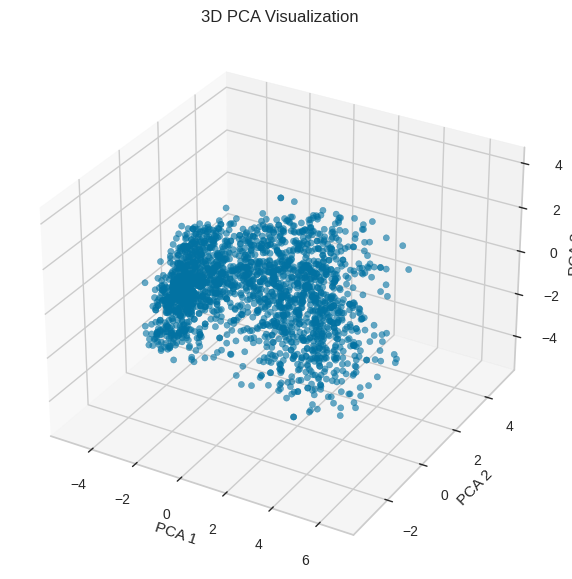

In [137]:
# 3d visualization

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    pca_data['PCA1'],
    pca_data['PCA2'],
    pca_data['PCA3'],
    s=20, alpha=0.6
)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D PCA Visualization')

plt.show()

## **Clustering**

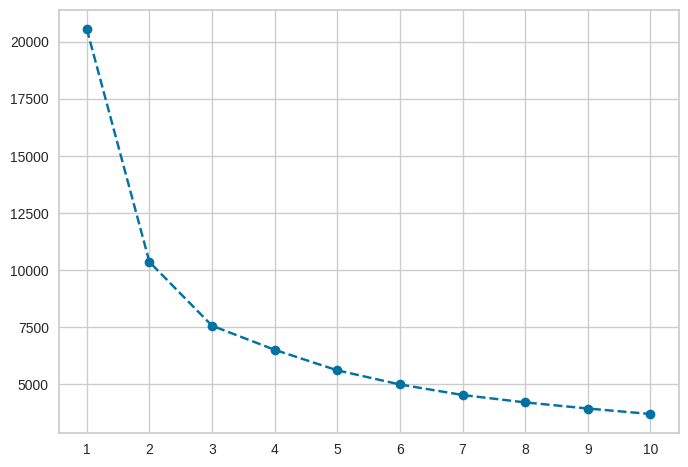

In [138]:
# elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  cluster = kmeans.fit(pca_data)
  inertia.append(cluster.inertia_)

# visulaization
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xticks(k_range)
plt.show()

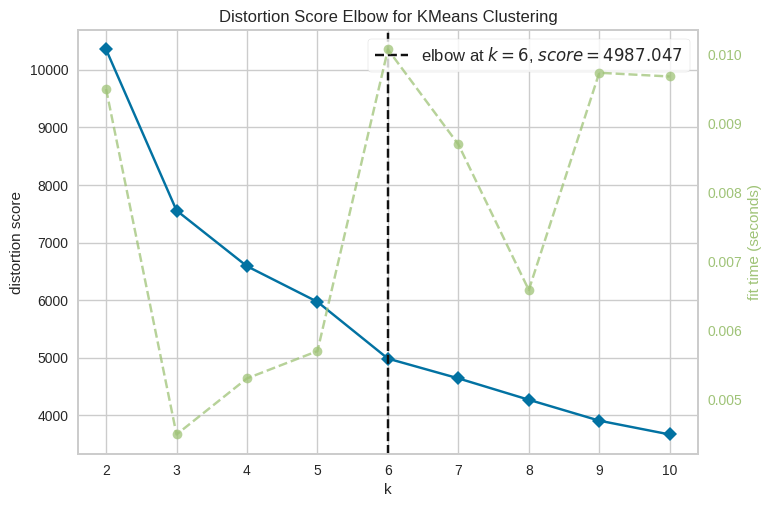

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [139]:
k_elbow = KElbowVisualizer(KMeans(), k=10, metrics='silhouette_score')
k_elbow.fit(pca_data)
k_elbow.show()

In [150]:
# kmeans | Agglomerative | dbscan

kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
kmeans_labels = kmeans.fit_predict(pca_data)

agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(pca_data)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)

In [151]:
# score

kmeans_score = silhouette_score(pca_data, kmeans_labels)
print(kmeans_score)

agglo_score = silhouette_score(pca_data, agglo_labels)
print(agglo_score)

mask = dbscan_labels != -1
dbscan_score = silhouette_score(pca_data[mask], dbscan_labels[mask])
print(dbscan_score)

0.3842895729225004
0.34867147584969205
-0.4716324037426669


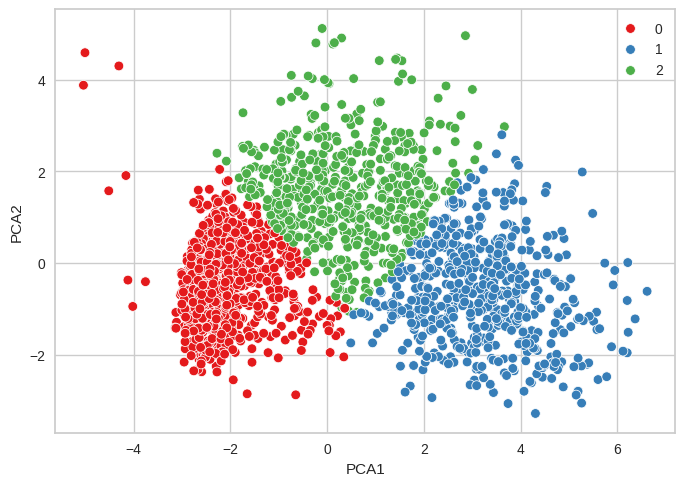

In [152]:
# visualization
sns.scatterplot(data=df, x=pca_data['PCA1'], y=pca_data['PCA2'], hue=kmeans_labels, palette='Set1')
plt.show()

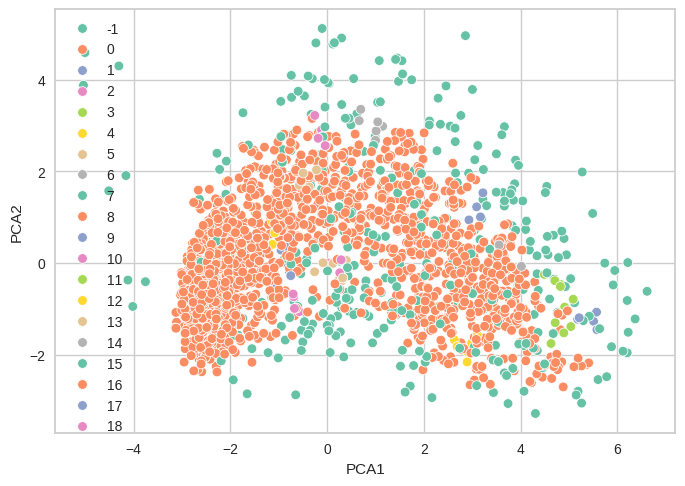

In [153]:
# dbscan visualization

sns.scatterplot(data=pca_data, x=pca_data['PCA1'], y=pca_data['PCA2'], hue=dbscan_labels, palette='Set2')
plt.show()

## **Evaluation**

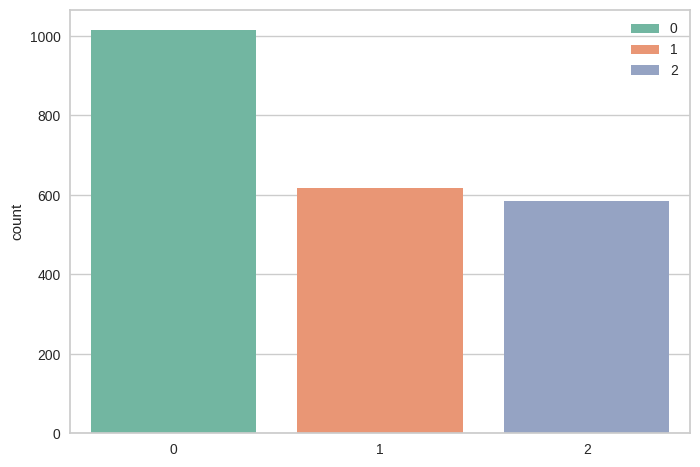

In [154]:
sns.countplot(data=pca_data, x=kmeans_labels, hue=kmeans_labels, palette='Set2')
plt.show()

In [155]:
df['Cluster'] = pd.DataFrame(kmeans_labels)

In [156]:
# size
df['Cluster'].value_counts()

,count
Cluster,
0.0,1004
1.0,613
2.0,576


## **Profiling**

In [157]:
profile = df.groupby('Cluster')[['Income', 'Customer_Tenure', 'Recency']].mean().round(3)
print(profile)

         Income  Customer_Tenure  Recency
Cluster                                  
0.0      -0.008           -0.010   -0.001
1.0      -0.029            0.013   -0.010
2.0       0.010            0.003    0.013
